<a href="https://colab.research.google.com/github/LimYeongJun/Jump-to-python/blob/master/smiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2019-11-30 05:14:17--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68.46M   219MB/s    in 0.3s    

2019-11-30 05:14:17 (219 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')


In [0]:
import numpy as np
import pandas as pd
 
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole
 
trainsdf = Chem.SDMolSupplier(os.path.join( RDConfig.RDDocsDir, 'Book/data/solubility.train.sdf'))
testsdf = Chem.SDMolSupplier(os.path.join( RDConfig.RDDocsDir, 'Book/data/solubility.test.sdf'))
train_mols = [mol for mol in trainsdf if mol != None]
test_mols = [mol for mol in testsdf if mol != None]
sol_class = {"(A) low":0, "(B) medium":1, "(C) high": 2}


In [0]:
from __future__ import print_function #2.X대 python호환을 위해
from rdkit import Chem

In [0]:
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

SMILES - A Simplified Chemcal Language

## 3. SMILES Sepcification Rules (SMILES 규칙)
- SMILE는 띄어쓰기를 사용하지 않고 원자들을 일렬로 나열하여 표현한다.
- 수소원자는 생략하거나, 포함해도 된다.
- 방향족 물질들은 직관적으로 명시하거나 Kekulé form으로 분류할 수 있다.
- 대표적으로 5가지의 규칙이 있다. ( 원자(atom), 결합(bond), 가지(branch), 고리닫힘(ring closure), 단절(disconnection) ) 
### 2.1 Atoms(원자)

- 수소를 포함하지 않는 단일원자는 [ ]사용
organic subset는 [ ] 없이 쓰이기도 한다.
- 최소 원자가 전자를 갖는다고 인식한다. :: B (3), C (4), N (3,5), O (2), P (3,5), S (2,4,6), 할로겐족(1).
지방족 탄소는 대문자 'C' 로, 방향족 탄소는 'c'로 명시한다.

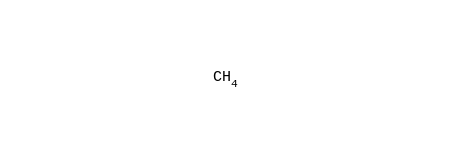

In [36]:
m = Chem.MolFromSmiles('C') # 수소를 생략해도 출력값에 포함된다.
m

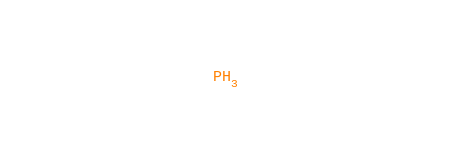

In [38]:
m = Chem.MolFromSmiles('P')
m

- '$[]$'속의 수소와 형식전하는 반드시 명시되어야 한다. - 결합된 수소의 수는 H 와 숫자로 표현된다.
- 형식전하는 + 혹은 - 로 표시되어야 한다. 명시되어 있지 않으면 전하는 0으로 가정한다.
$[Fe+++] = [Fe+3]$

RDKit WARNING: [05:52:22] WARNING: not removing hydrogen atom without neighbors


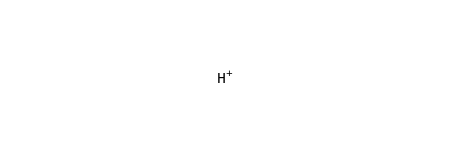

In [43]:
m = Chem.MolFromSmiles('[H+]')
m

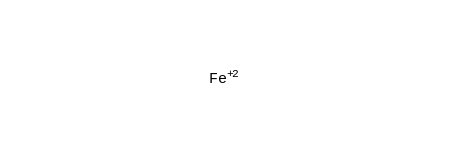

In [46]:
m = Chem.MolFromSmiles('[Fe++]')
m

### 2.2 결합
- 단일결합은 생략해도 상관없고, 이중결합과 삼중결합, 방향족 결합만 표기해준다.

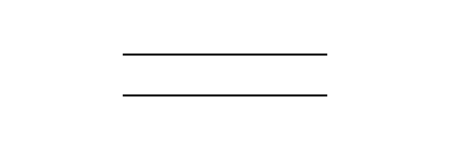

In [68]:
m = Chem.MolFromSmiles('C=C') # 이중결합은 = 을 이용하여 연결해준다.
m

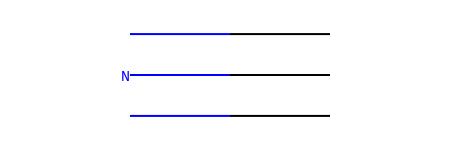

In [69]:
m = Chem.MolFromSmiles('C#N') # 삼중결합은 #을 이용하여 연결해준다.
m

이와 같은 규칙을 이용하여 6-hydroxy-1,4-hexadiene을 표현해보면

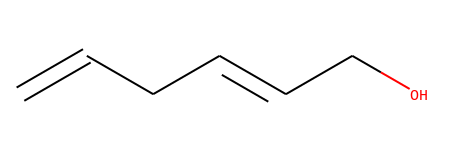

In [73]:
m = Chem.MolFromSmiles('C=CCC=CCO')
m

### 가지(치환기, 알킬기)
- 가지들은 중첩되거나 쌓일 수 있으며, 소괄호`()`로 묶어 **결합 원소의 오른쪽에 써준다.**

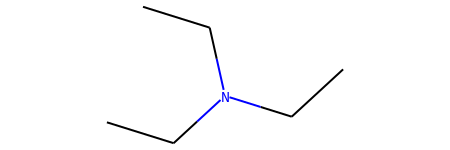

In [74]:
m = Chem.MolFromSmiles('CCN(CC)CC') # Triethylamine
m

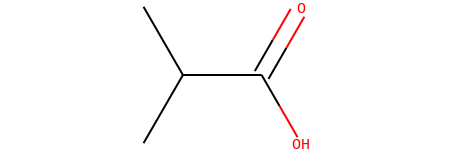

In [76]:
m = Chem.MolFromSmiles('CC(C)C(=O)O') # Isobutyric acid
m

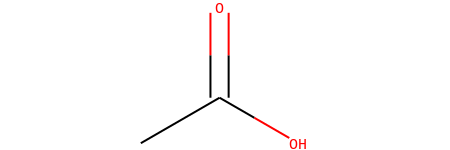

In [78]:
m = Chem.MolFromSmiles('CC(=O)O') # acetic acid
m

### 2.4 고리구조

- 고리형 구조는 고리에서 하나의 결합을 끊어 선형적으로 표시하고, 결합을 끊은 원자 바로 뒤에 숫자를 이용해 고리형 구조를 표현 <br>

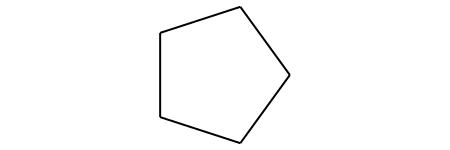

In [80]:
m = Chem.MolFromSmiles('C1CCCC1') # cyclopentane
m

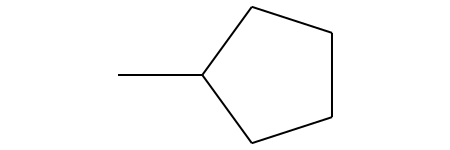

In [81]:
m = Chem.MolFromSmiles('C1CCC(C)C1')
m

- 한 가지의 분자의 다양한 표현은 우선순위가 없다.
- 한 원자는 하나 이상의 `ring closure`을 가질 수 있다. 아래와 같은구조로 설명할 수 있다.

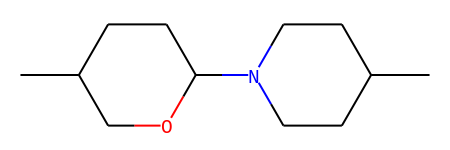

In [93]:
m = Chem.MolFromSmiles('O1CC(C)CCC1N1CCC(C)CC1')
m

### 3.5 연결되지 않은 구조

* disconnected혼합물은 ' . '을 사용하여 각각의 구조들을 분리시킨다.
* 이온 혹은 리간드(ligands)의 연결은 순서에 상관없이 사용가능하다. 한 전하가 다른 전하로의 연결을 의미하는 것도 아니고, 알짜 전하를 반드시 0으로 가질 필요도 없다.
<br><br>
* 필요에 따라, 한 이온의 SMILE이 sodium phenoxide(석탄산나트륨)와 같이 다른 이온에 삽입될 수 있다.



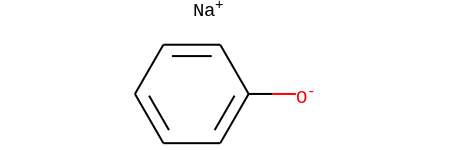

In [101]:
m = Chem.MolFromSmiles('[Na+].[O-]c1ccccc1')
m

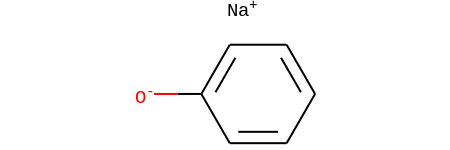

In [102]:
m = Chem.MolFromSmiles('c1cc([O-].[Na+])ccc1')
m